# Experiment 001: *Distribution of Playlists and Number of Follower*

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
%matplobtlib inline

UsageError: Line magic function `%matplobtlib` not found.


In [2]:
import os
os.chdir('../')


from src.get_data import get_data

## Hypothesis:

The number of followers is mostly the same (only 1). But outliers have a big difference to the other playlists

Do estimate what fit we need, we made a scatter plot and histogram of the playlists.

In [3]:
dataset = get_data(True)

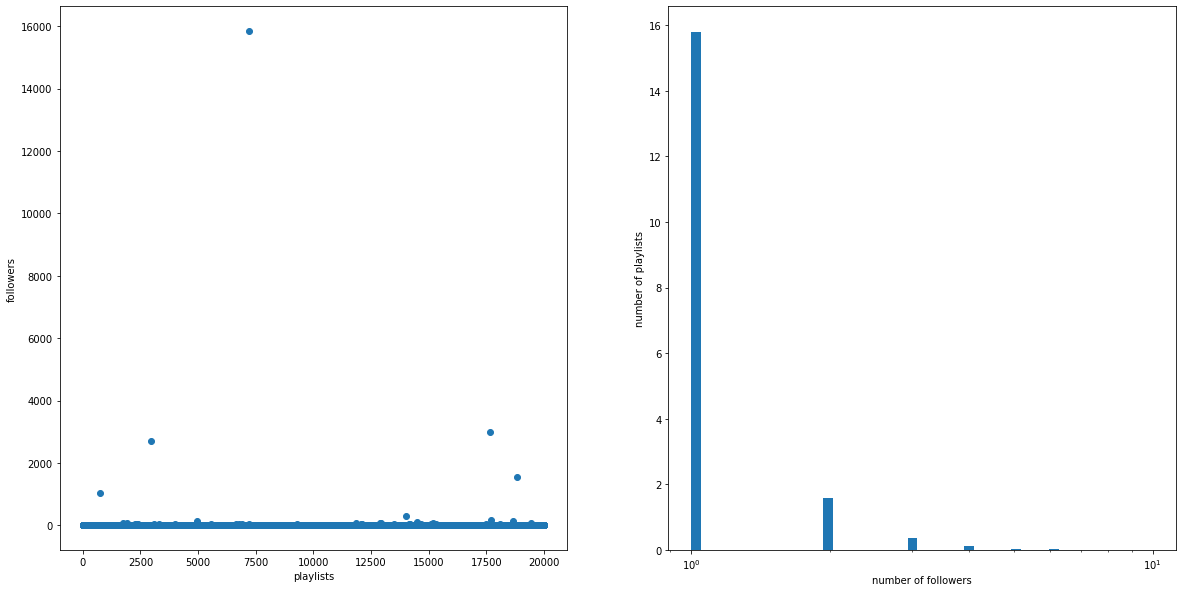

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

axs[1].hist(dataset.num_followers, bins=np.logspace(np.log10(1),np.log10(10)), density=True)
axs[1].set_xscale("log")
axs[1].set_xlabel('number of followers')
axs[1].set_ylabel('number of playlists')
plt.show()

## Idea: 
If you sort the followers you can see a pareto (80/20) distribution?

In [15]:
#sorting data after num_followers
dataset = dataset.sort_values(by='num_followers', ascending=False)
dataset = dataset.reset_index(drop=True)

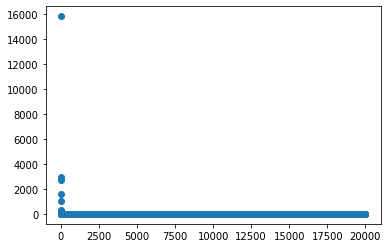

In [17]:
plt.figsize=(20, 10)

plt.scatter(dataset.index, dataset.num_followers)

Try to fit pareto distribution

/home/jonas/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


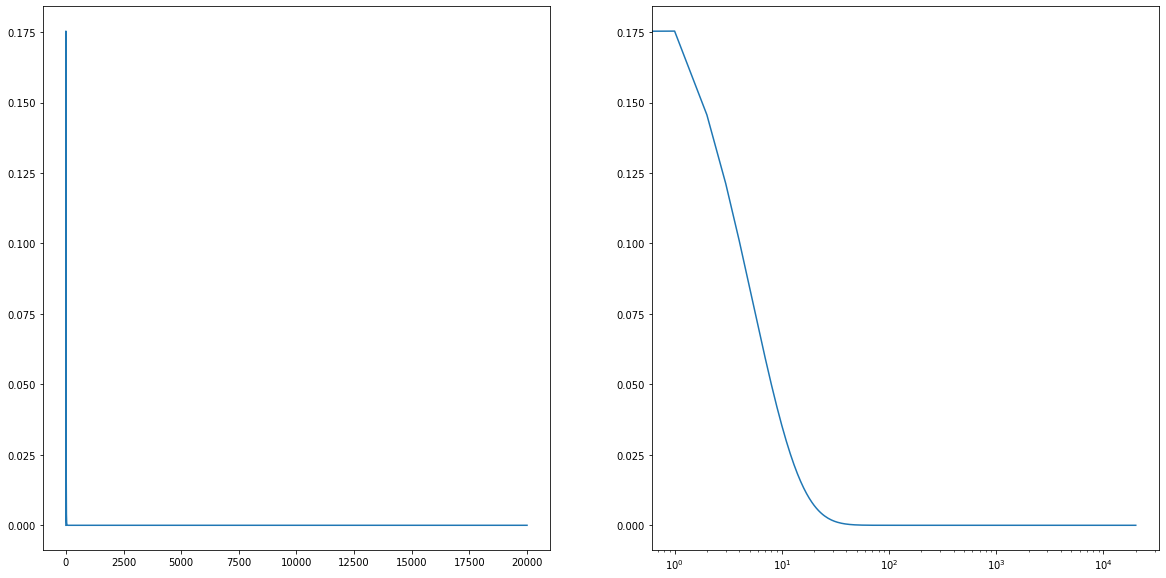

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

a,b,c = stats.pareto.fit(dataset.num_followers)
axs[0].plot(dataset.index, stats.pareto(a,b,c).pdf(dataset.index))

axs[1].plot(dataset.index, stats.pareto(a,b,c).pdf(dataset.index))
axs[1].set_xscale("log")
#plt.scatter(dataset.index, dataset.num_followers)

### Find the x best

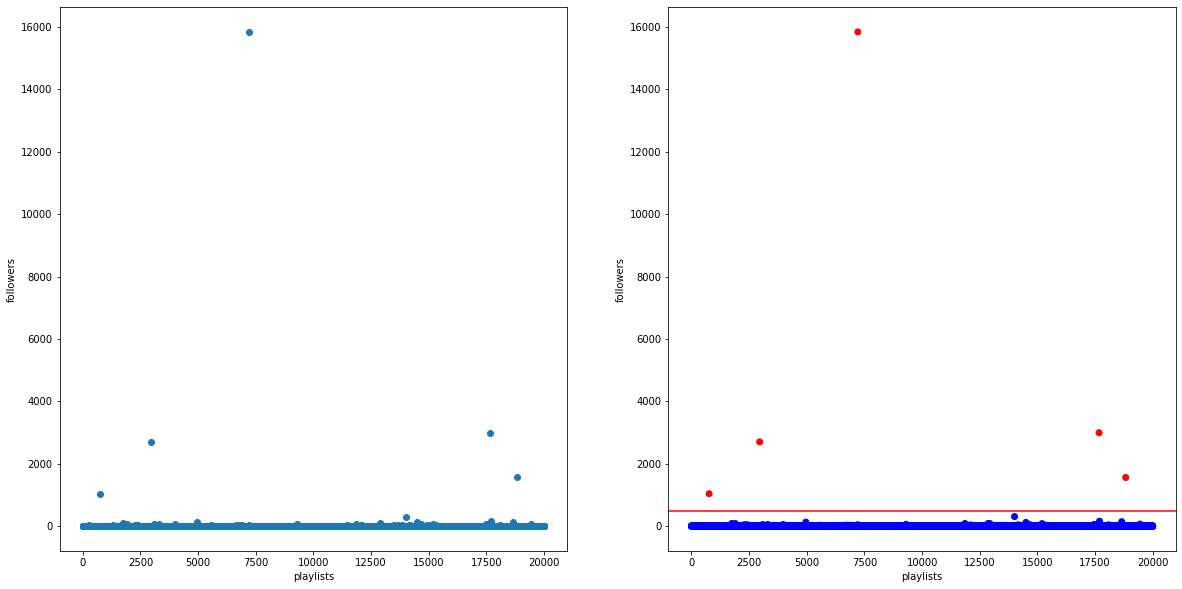

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

border = 500

colors = np.where(dataset['num_followers']>border,'r','b')
axs[1].scatter(dataset.index, dataset.num_followers, c=colors)
axs[1].axhline(y = border, color = 'r', linestyle = '-')
axs[1].set_xlabel('playlists')
axs[1].set_ylabel('followers')
plt.show()

Text(0, 0.5, 'followers')

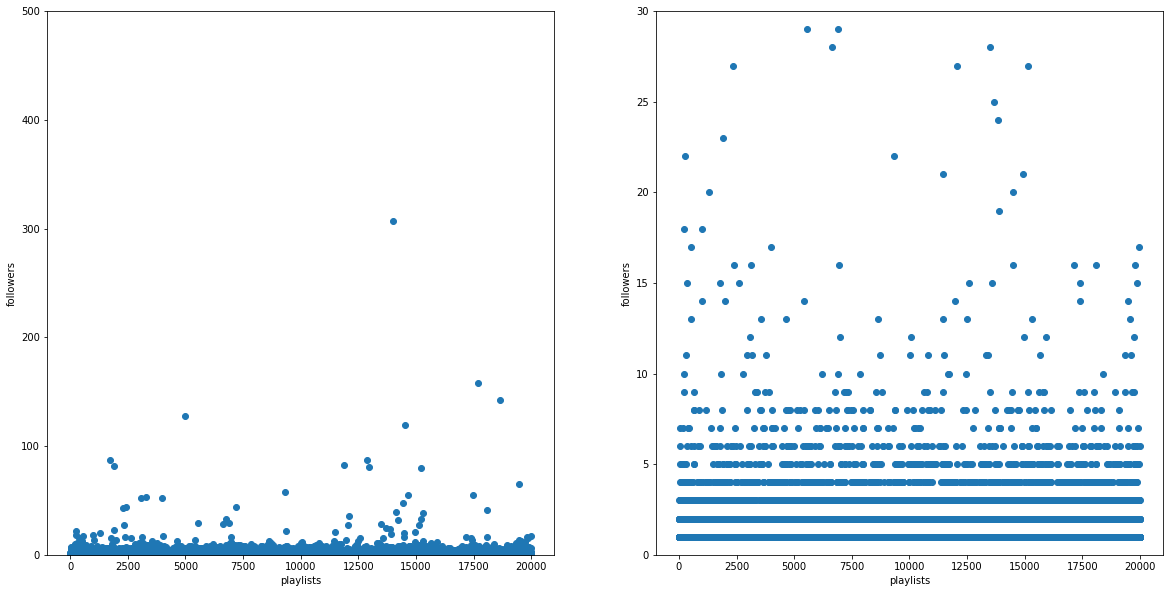

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_ylim([0,border])
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

axs[1].scatter(dataset.index, dataset.num_followers)
axs[1].set_ylim([0,30])
axs[1].set_xlabel('playlists')
axs[1].set_ylabel('followers')

#### Idea classification with the distance

Nicht möglich weil dafür Mittelwert der beiden Gruppen bekannt sein müsste

### Idea: classification with hypotheses
Classifie data with border and then show with test, that the two categories are different

In [15]:
category1 = []
category2 = []

i = 0
for entry in dataset.num_followers:
    if entry > border:
        #category1.append([i, entry])
        category1.append(entry)
    else:
        #category2.append([i, entry])
        category2.append(entry)
    i += 1
        
print(category1)
print(category2)

[1038, 2699, 15842, 2994, 1559]
[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 5, 2, 7, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 5, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 10, 3, 1, 1, 1, 1, 1, 2, 9, 1, 1, 1, 1, 1, 3, 1, 1, 1, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 22, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 11, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 

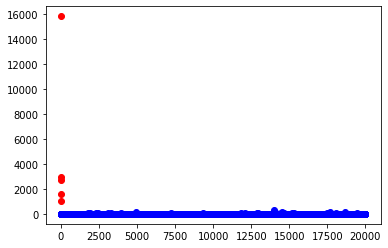

In [16]:
#plt.scatter(category2[:][0], category2[:][1])
plt.scatter(range(len(category1)), category1, c='r')
plt.scatter(range(len(category2)), category2, c='b')
plt.show()

In [17]:
stats.kruskal(category1, category2)

KruskalResult(statistic=26.503556332059517, pvalue=2.6305339665175734e-07)

Make border more strict

In [27]:
category1 = []
category2 = []

#border = 200 #KruskalResult(statistic=31.802676987457783, pvalue=1.706573684484981e-08)
#border = 100 #KruskalResult(statistic=52.993857572205854, pvalue=3.345930579678586e-13)
border = 10 #KruskalResult(statistic=543.297322479939, pvalue=3.61502215767813e-120)

i = 0
for entry in dataset.num_followers:
    if entry > border:
        #category1.append([i, entry])
        category1.append(entry)
    else:
        #category2.append([i, entry])
        category2.append(entry)
    i += 1
        
print(category1)
print(category2)

[18, 22, 11, 15, 13, 17, 1038, 18, 14, 20, 87, 15, 82, 23, 14, 43, 27, 16, 44, 15, 2699, 11, 12, 52, 16, 11, 53, 13, 11, 52, 17, 13, 128, 14, 29, 28, 33, 29, 16, 12, 44, 15842, 13, 11, 58, 22, 11, 12, 11, 13, 21, 11, 83, 14, 27, 36, 13, 15, 87, 81, 11, 11, 28, 15, 25, 24, 19, 307, 39, 32, 48, 16, 20, 119, 55, 21, 12, 27, 80, 33, 38, 13, 11, 12, 16, 15, 14, 55, 2994, 158, 16, 41, 142, 1559, 11, 65, 14, 13, 11, 12, 16, 15, 17]
[1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 5, 2, 7, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 5, 1, 1, 1, 2, 

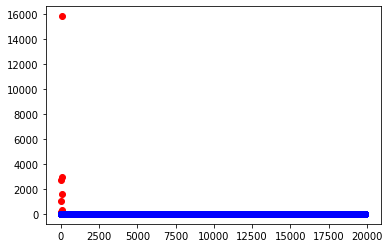

In [28]:
plt.scatter(range(len(category1)), category1, c='r')
plt.scatter(range(len(category2)), category2, c='b')
plt.show()

In [29]:
stats.kruskal(category1, category2)

KruskalResult(statistic=543.297322479939, pvalue=3.61502215767813e-120)